In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/nyse/prices.csv')

# Display basic information about the dataset
print("Shape of the dataset:", data.shape)
print("\nColumn names:", data.columns)
print("\nData types of columns:\n", data.dtypes)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Summary statistics
print("\nSummary statistics of numerical features:")
print(data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Shape of the dataset: (851264, 7)

Column names: Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

Data types of columns:
 date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

First few rows of the dataset:
                  date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  

Summary statistics of numerical features:
                open          close            low

Shape of the numeric dataset: (851264, 5)

Column names of numeric dataset: Index(['open', 'close', 'low', 'high', 'volume'], dtype='object')


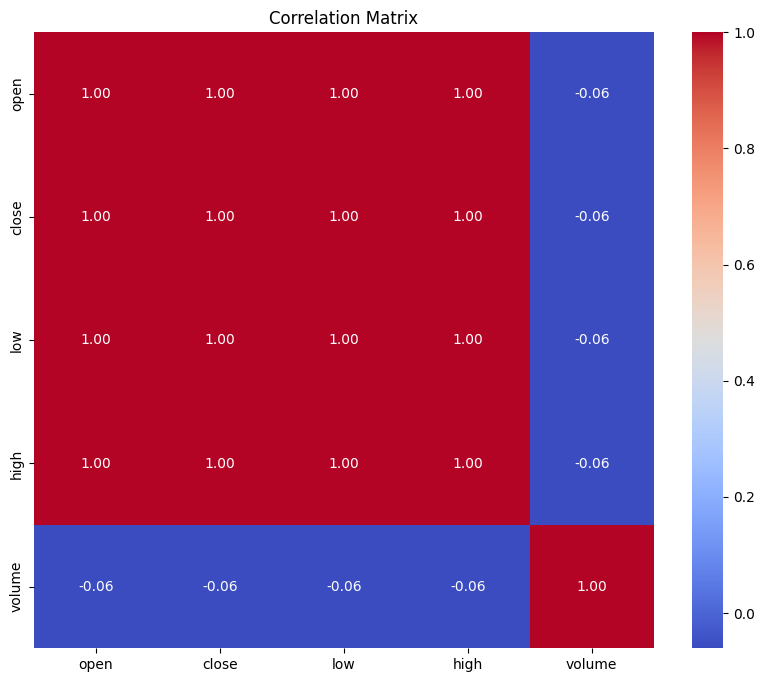

In [13]:
numeric_data = data.select_dtypes(include=[np.number])

# Display basic information about the numeric dataset
print("Shape of the numeric dataset:", numeric_data.shape)
print("\nColumn names of numeric dataset:", numeric_data.columns)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [17]:
#Part 1: Exploratory Data Analysis (EDA)
#Prices-split-adjusted
df = pd.read_csv("/kaggle/input/nyse/prices-split-adjusted.csv", index_col = 0)
df.info()
df.head()
df.dropna(inplace=True)
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


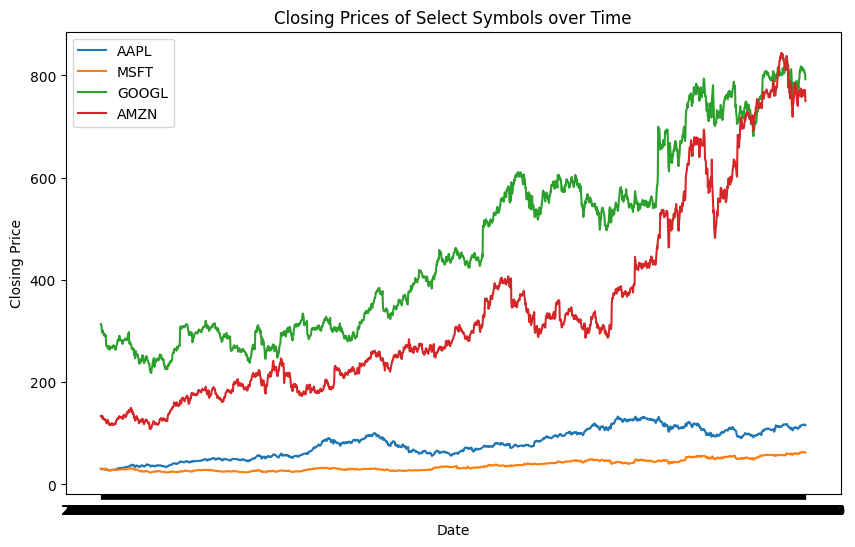

In [19]:
import matplotlib.pyplot as plt

symbols_to_plot = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
plt.figure(figsize=(10, 6))
for symbol in symbols_to_plot:
    plt.plot(df[df['symbol'] == symbol].index, df[df['symbol'] == symbol]['close'], label=symbol)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices of Select Symbols over Time')
plt.legend()
plt.show()

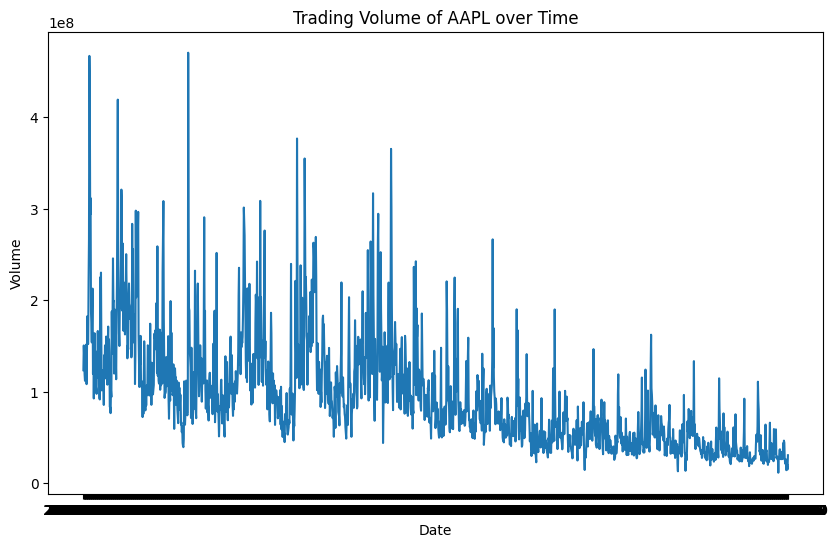

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df[df['symbol'] == 'AAPL'].index, df[df['symbol'] == 'AAPL']['volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume of AAPL over Time')
plt.show()

In [31]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Error in callback <function _draw_all_if_interactive at 0x7f7915a7ec20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

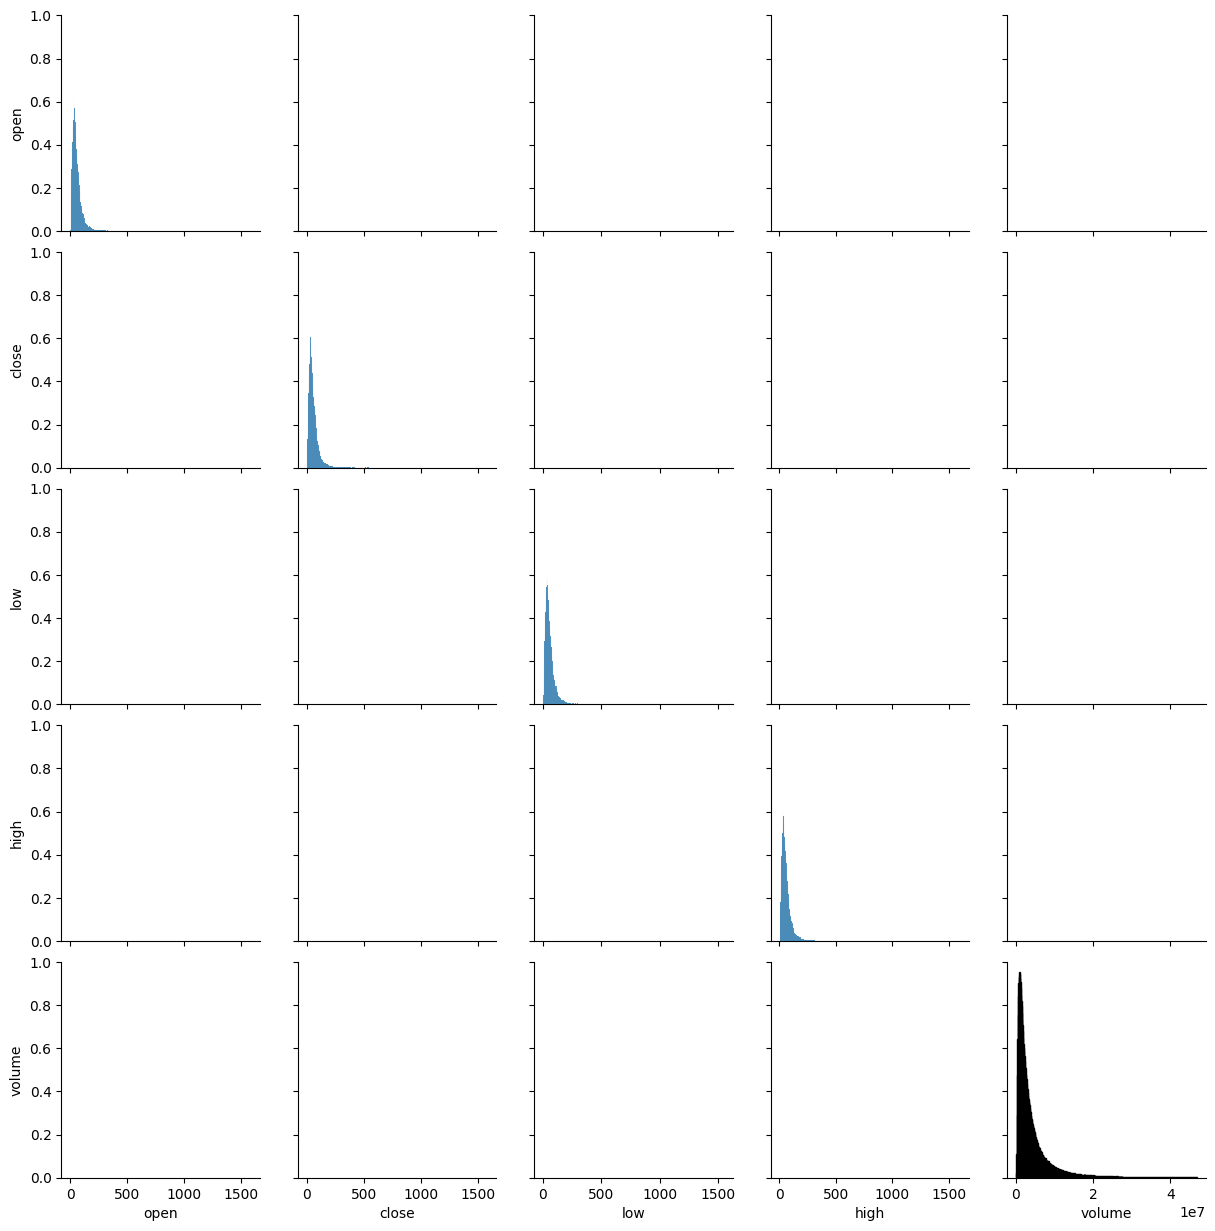

In [32]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

In [33]:
X = df.drop(['close'], axis=1)
y = df['close']
#Prices
prices_dataframe = pd.read_csv('/kaggle/input/nyse/prices.csv')
prices_dataframe.info()
prices_dataframe.head()
prices_dataframe.dropna(inplace=True)
prices_dataframe.isnull().sum()
prices_dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [34]:
print(prices_dataframe.columns)
prices_dataframe = prices_dataframe.loc[prices_dataframe['symbol']=='AAPL']
prices_dataframe.drop('symbol', axis=1, inplace=True)
print(np.shape(prices_dataframe))
prices_dataframe.head()

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')
(1762, 6)


,date,open,close,low,high,volume
254,2010-01-04,213.429998,214.009998,212.380001,214.499996,123432400.0
721,2010-01-05,214.599998,214.379993,213.249994,215.589994,150476200.0
1189,2010-01-06,214.379993,210.969995,210.750004,215.230000,138040000.0
1657,2010-01-07,211.750000,210.580000,209.050005,212.000006,119282800.0
2125,2010-01-08,210.299994,211.980005,209.060005,212.000006,111902700.0


In [35]:

prices_dataframe['date'] = pd.to_datetime(prices_dataframe['date'])
prices_dataframe = prices_dataframe.set_index('date')

prices_dataframe.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,213.429998,214.009998,212.380001,214.499996,123432400.0
2010-01-05,214.599998,214.379993,213.249994,215.589994,150476200.0
2010-01-06,214.379993,210.969995,210.750004,215.230000,138040000.0
2010-01-07,211.750000,210.580000,209.050005,212.000006,119282800.0
2010-01-08,210.299994,211.980005,209.060005,212.000006,111902700.0


In [ ]:
#Fundamentals
fundamentals_dataframe = pd.read_csv('/kaggle/input/nyse/fundamentals.csv', index_col=['Unnamed: 0'])
fundamentals_dataframe.info()
fundamentals_dataframe.head()
fundamentals_dataframe.dropna(inplace=True)
fundamentals_dataframe.isnull().sum()
fundamentals_dataframe.describe()

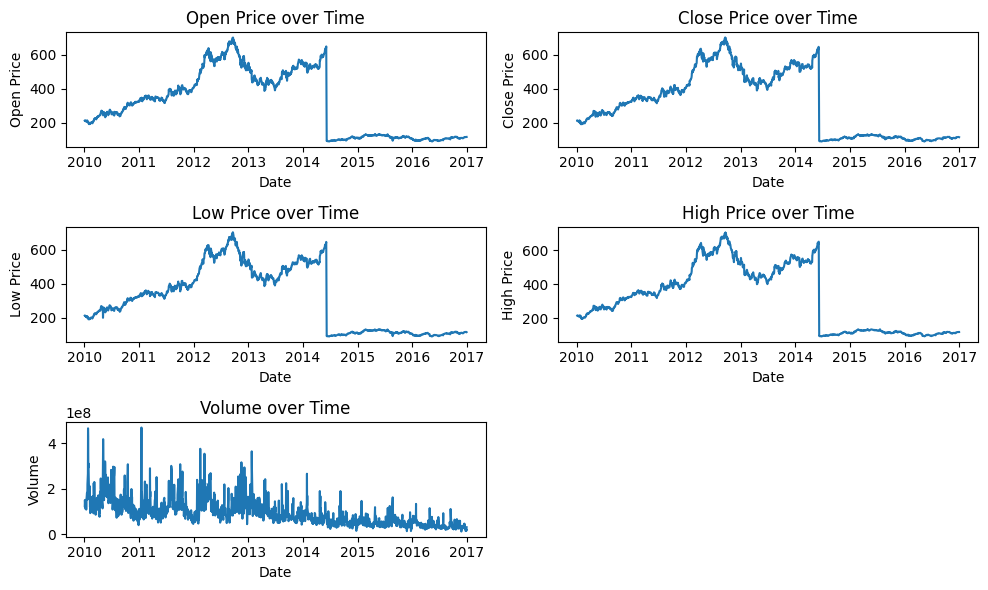

In [36]:
# Plotting individual numerical columns over time
plt.figure(figsize=(10, 6))

plt.subplot(3, 2, 1)
plt.plot(prices_dataframe.index, prices_dataframe['open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price over Time')

plt.subplot(3, 2, 2)
plt.plot(prices_dataframe.index, prices_dataframe['close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price over Time')

plt.subplot(3, 2, 3)
plt.plot(prices_dataframe.index, prices_dataframe['low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low Price over Time')

plt.subplot(3, 2, 4)
plt.plot(prices_dataframe.index, prices_dataframe['high'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High Price over Time')

plt.subplot(3, 2, 5)
plt.plot(prices_dataframe.index, prices_dataframe['volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume over Time')

plt.tight_layout()
plt.show()

In [39]:
prices_dataframe = prices_dataframe.sample(frac=0.75, replace=False, random_state=7)
prices_dataframe['year'] = prices_dataframe.index.year
prices_dataframe['month'] = prices_dataframe.index.month
prices_dataframe['day'] = prices_dataframe.index.day

In [40]:
#Fundamentals
fundamentals_dataframe = pd.read_csv('/kaggle/input/nyse/fundamentals.csv', index_col=['Unnamed: 0'])
fundamentals_dataframe.info()
fundamentals_dataframe.head()
fundamentals_dataframe.dropna(inplace=True)
fundamentals_dataframe.isnull().sum()
fundamentals_dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1781 non-null   object 
 1   Period Ending                                        1781 non-null   object 
 2   Accounts Payable                                     1781 non-null   float64
 3   Accounts Receivable                                  1781 non-null   float64
 4   Add'l income/expense items                           1781 non-null   float64
 5   After Tax ROE                                        1781 non-null   float64
 6   Capital Expenditures                                 1781 non-null   float64
 7   Capital Surplus                                      1781 non-null   float64
 8   Cash Ratio                                           1482 non-null   floa

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1.299000e+03,1.299000e+03,1.299000e+03,1299.000000,1.299000e+03,1.299000e+03,1299.000000,1.299000e+03,1.299000e+03,1.299000e+03,...,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1299.000000,1299.000000,1.299000e+03
mean,3.709840e+09,-7.364829e+07,8.845911e+07,47.234796,-1.471495e+09,4.248825e+09,73.934565,1.820352e+09,-8.116966e+07,1.344123e+09,...,8.085596e+09,5.637950e+09,9.537915e+09,1.712867e+10,2.666659e+10,2.134803e+10,-4.399277e+09,2013.219400,3.319923,5.807538e+08
std,7.463106e+09,5.304388e+08,7.583589e+08,249.888806,3.380823e+09,8.643626e+09,100.580915,3.072288e+09,4.218345e+08,6.212344e+09,...,1.447895e+10,1.001800e+10,1.824904e+10,2.844549e+10,4.361829e+10,4.489432e+10,1.605909e+10,22.193998,5.016596,9.966520e+08
min,7.199000e+07,-6.452000e+09,-4.577000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,0.000000e+00,...,1.447860e+08,1.642480e+08,-1.324400e+10,2.320000e+08,1.103602e+09,5.804150e+08,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,6.342590e+08,-1.010000e+08,-3.427000e+06,11.000000,-1.399000e+09,3.534500e+08,16.000000,2.970000e+08,-7.323100e+07,1.671000e+06,...,1.814450e+09,1.085870e+09,2.076000e+09,3.311690e+09,6.165850e+09,4.123165e+09,-3.186500e+09,2013.000000,1.590000,1.437613e+08
50%,1.388700e+09,-2.101900e+07,4.000000e+06,18.000000,-4.299870e+08,1.506000e+09,41.000000,8.270000e+08,-2.153000e+06,9.000000e+06,...,3.494000e+09,2.357200e+09,4.307075e+09,7.848200e+09,1.294400e+10,8.205088e+09,-3.381500e+08,2014.000000,2.790000,2.855204e+08
75%,3.261234e+09,1.710000e+07,3.780000e+07,28.000000,-1.563680e+08,5.044000e+09,89.000000,1.963500e+09,0.000000e+00,2.977500e+08,...,7.832350e+09,5.356500e+09,9.816950e+09,1.864400e+10,3.098300e+10,1.749658e+10,0.000000e+00,2015.000000,4.500000,5.570089e+08
max,6.067100e+10,4.692000e+09,1.416200e+10,5789.000000,0.000000e+00,9.110800e+10,1041.000000,5.352800e+10,2.658000e+09,6.846500e+10,...,1.396600e+11,8.233600e+10,1.743990e+11,2.800010e+11,4.026720e+11,4.856510e+11,0.000000e+00,2016.000000,50.090000,8.419048e+09


In [44]:
fundamentals_dataframe.isnull().sum(axis=0)

missing_columns = ['Current Ratio', 'Cash Ratio', 'Quick Ratio', 'For Year', 'Earnings Per Share', 'Estimated Shares Outstanding']
for column in missing_columns:
    median_value = fundamentals_dataframe[column].median()
    fundamentals_dataframe[column] = fundamentals_dataframe[column].fillna(median_value)

In [46]:
#Securities
securities_dataframe = pd.read_csv('/kaggle/input/nyse/securities.csv')
securities_dataframe.info()
securities_dataframe.head()
securities_dataframe.dropna(inplace=True)
securities_dataframe.isnull().sum()
securities_dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


,CIK
count,3.070000e+02
mean,7.679600e+05
std,5.306331e+05
min,1.800000e+03
25%,9.837000e+04
50%,8.725890e+05
75%,1.131866e+06
max,1.659166e+06


In [47]:
securities_dataframe=securities_dataframe.dropna(subset=['Date first added'])
securities_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 1 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            307 non-null    object
 1   Security                 307 non-null    object
 2   SEC filings              307 non-null    object
 3   GICS Sector              307 non-null    object
 4   GICS Sub Industry        307 non-null    object
 5   Address of Headquarters  307 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      307 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 21.6+ KB


In [49]:
from numpy import vstack,sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset,DataLoader,random_split
from torch import Tensor
from torch.nn import ReLU,Module,MSELoss,Linear
from torch.optim import SGD
from torch.nn.init import xavier_uniform_
from tqdm import tqdm

# dataset definition perparation
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path, header=None)

        df.head()
        # store the inputs and outputs
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        # ensure target has the right shape
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        return X

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=32, shuffle=False)
    return train_dl, test_dl

# train the model
def train_model(train_dl, model):
    size = len(train_dl.dataset)
    # define the optimization
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    # enumerate epochs
    for epoch in tqdm(range(100),desc='Training Epochs'):
        print(f"Epoch {epoch+1}\n-------------------------------")
        # enumerate mini batches
        for batch, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

            if batch % 100 == 0:
                loss, current = loss.item(), batch * len(inputs)
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate mse
    mse = mean_squared_error(actuals, predictions)
    return mse
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

In [55]:
data = pd.read_csv("/kaggle/input/nyse/prices-split-adjusted.csv")
df = pd.DataFrame(data)
X = df.drop(['date', 'symbol', 'volume'], axis=1)
X = X[['low', 'high', 'open', 'close']]

csv_path = '/kaggle/working/MyWork.csv'
csv_path1 = '/kaggle/working/MyWork1.csv'

X.to_csv(csv_path, index=False)
X = pd.read_csv(csv_path, skiprows=1)
X.to_csv(csv_path1, index=False)

train_dl, test_dl = prepare_data(csv_path1)
print(len(train_dl.dataset), len(test_dl.dataset))
model = MLP(3)
train_losses = train_model(train_dl, model)

570347 280917


Training Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1
-------------------------------
loss: 11060.559570  [    0/570347]
loss: 422641344.000000  [ 3200/570347]
loss: 31791.027344  [ 6400/570347]
loss: 4877.576660  [ 9600/570347]
loss: 1092.613770  [12800/570347]
loss: 1301.473511  [16000/570347]
loss: 6227.639648  [19200/570347]
loss: 2869.141846  [22400/570347]
loss: 3853.803711  [25600/570347]
loss: 1062.711548  [28800/570347]
loss: 2490.210938  [32000/570347]
loss: 20062.820312  [35200/570347]
loss: 8126.310547  [38400/570347]
loss: 2716.937500  [41600/570347]
loss: 1125.098877  [44800/570347]
loss: 2177.497803  [48000/570347]
loss: 1015.365417  [51200/570347]
loss: 51231.812500  [54400/570347]
loss: 1246.224976  [57600/570347]
loss: 2147.928467  [60800/570347]
loss: 1939.642334  [64000/570347]
loss: 7791.560059  [67200/570347]
loss: 1285.924072  [70400/570347]
loss: 1916.354980  [73600/570347]
loss: 1449.345947  [76800/570347]
loss: 16665.941406  [80000/570347]
loss: 1573.672363  [83200/570347]
loss: 992.328613  [86400/570347]

Training Epochs:   1%|          | 1/100 [00:23<39:33, 23.98s/it]

loss: 1654.790527  [569600/570347]
Epoch 2
-------------------------------
loss: 4687.578613  [    0/570347]
loss: 3029.115967  [ 3200/570347]
loss: 1673.817627  [ 6400/570347]
loss: 3247.787598  [ 9600/570347]
loss: 5208.628418  [12800/570347]
loss: 7794.864746  [16000/570347]
loss: 9278.582031  [19200/570347]
loss: 2092.475342  [22400/570347]
loss: 7434.645020  [25600/570347]
loss: 2969.912354  [28800/570347]
loss: 6280.700684  [32000/570347]
loss: 3544.572021  [35200/570347]
loss: 2560.657227  [38400/570347]
loss: 5347.530762  [41600/570347]
loss: 1209.557739  [44800/570347]
loss: 1240.268799  [48000/570347]
loss: 5642.571289  [51200/570347]
loss: 970.647888  [54400/570347]
loss: 3459.523926  [57600/570347]
loss: 3014.979736  [60800/570347]
loss: 6099.417969  [64000/570347]
loss: 1814.999390  [67200/570347]
loss: 1169.167969  [70400/570347]
loss: 3683.772461  [73600/570347]
loss: 1858.440552  [76800/570347]
loss: 18138.216797  [80000/570347]
loss: 1103.660400  [83200/570347]
loss: 7

Training Epochs:   2%|▏         | 2/100 [00:47<39:07, 23.96s/it]

Epoch 3
-------------------------------
loss: 1197.873169  [    0/570347]
loss: 892.242310  [ 3200/570347]
loss: 3230.112549  [ 6400/570347]
loss: 6201.102051  [ 9600/570347]
loss: 8374.938477  [12800/570347]
loss: 1622.446289  [16000/570347]
loss: 3286.157959  [19200/570347]
loss: 16548.160156  [22400/570347]
loss: 1618.113525  [25600/570347]
loss: 4855.378418  [28800/570347]
loss: 3179.856201  [32000/570347]
loss: 15166.968750  [35200/570347]
loss: 4796.785645  [38400/570347]
loss: 1757.359009  [41600/570347]
loss: 65068.207031  [44800/570347]
loss: 6043.662598  [48000/570347]
loss: 3144.479980  [51200/570347]
loss: 7787.852539  [54400/570347]
loss: 1319.172607  [57600/570347]
loss: 1290.913574  [60800/570347]
loss: 1188.363037  [64000/570347]
loss: 24346.695312  [67200/570347]
loss: 1395.355957  [70400/570347]
loss: 1945.226562  [73600/570347]
loss: 1016.607788  [76800/570347]
loss: 1773.071777  [80000/570347]
loss: 9150.442383  [83200/570347]
loss: 3024.567871  [86400/570347]
loss:

Training Epochs:   3%|▎         | 3/100 [01:11<38:44, 23.97s/it]

loss: 1448.781006  [569600/570347]
Epoch 4
-------------------------------
loss: 1189.730347  [    0/570347]
loss: 5376.890625  [ 3200/570347]
loss: 3729.638184  [ 6400/570347]
loss: 3297.188965  [ 9600/570347]
loss: 18467.384766  [12800/570347]
loss: 1484.245605  [16000/570347]
loss: 9732.142578  [19200/570347]
loss: 1162.251343  [22400/570347]
loss: 2504.901123  [25600/570347]
loss: 1410.739990  [28800/570347]
loss: 15079.029297  [32000/570347]
loss: 1469.598633  [35200/570347]
loss: 7914.350098  [38400/570347]
loss: 5522.432617  [41600/570347]
loss: 2142.336670  [44800/570347]
loss: 9292.254883  [48000/570347]
loss: 8840.165039  [51200/570347]
loss: 2766.083008  [54400/570347]
loss: 1979.789429  [57600/570347]
loss: 1713.489990  [60800/570347]
loss: 829.872925  [64000/570347]
loss: 1301.264282  [67200/570347]
loss: 3052.146484  [70400/570347]
loss: 4499.494141  [73600/570347]
loss: 8247.935547  [76800/570347]
loss: 46897.113281  [80000/570347]
loss: 920.182739  [83200/570347]
loss: 

Training Epochs:   3%|▎         | 3/100 [01:22<44:41, 27.64s/it]


KeyboardInterrupt: 

In [56]:
from sklearn.model_selection import GridSearchCV

mlp = MLP(n_inputs=3)
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

print("Test Mean Squared Error with Best Model: ", test_mse)

NameError: name 'param_grid' is not defined

In [57]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

NameError: name 'train_losses' is not defined

In [60]:
# Apply regularization techniques (e.g., L2 regularization)
class RegularizedRegressionNN(nn.Module):
    def __init__(self, input_dim):
        super(RegularizedRegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x